## Here is testing reproducibility but up to 5 trys by 200 terms

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import *
from calculus.generation_threading import *

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 200
RANDOM_AVERAGE_COUNT = 20
COUNT_TESTS = 5

terms_all = []
stepsLO_all = []
stepsRI_all = []
stepsRand_all = []

In [3]:
gen_threads = [
    GenTermsThreadV2(
        count_terms=LAMBDA_TERM_COUNT,
        random_average_count=RANDOM_AVERAGE_COUNT,
        thread_name=i,
    )
    for i in range(COUNT_TESTS)
]

for gen_thread in gen_threads:
    gen_thread.start()
    if gen_thread.is_alive():
        gen_thread.join()

Th_0: generated 202 terms
Th_1: generated 200 terms
Th_2: generated 200 terms
Th_3: generated 200 terms
Th_4: generated 201 terms
Running thread: 0
Thread 0 is doing RI norm


100%|██████████| 202/202 [00:38<00:00,  5.30it/s] 


Thread 0 is DONE RI norm
Thread 0 is doing Random norm


100%|██████████| 202/202 [01:12<00:00,  2.81it/s]


Thread 0 is DONE Random norm
Thread 0 is DONE
Running thread: 1
Thread 1 is doing RI norm


100%|██████████| 200/200 [04:31<00:00,  1.36s/it]


Thread 1 is DONE RI norm
Thread 1 is doing Random norm


100%|██████████| 200/200 [00:11<00:00, 17.83it/s]


Thread 1 is DONE Random norm
Thread 1 is DONE
Running thread: 2
Thread 2 is doing RI norm


100%|██████████| 200/200 [04:29<00:00,  1.35s/it] 


Thread 2 is DONE RI norm
Thread 2 is doing Random norm


100%|██████████| 200/200 [00:09<00:00, 20.19it/s]


Thread 2 is DONE Random norm
Thread 2 is DONE
Running thread: 3
Thread 3 is doing RI norm


100%|██████████| 200/200 [01:27<00:00,  2.30it/s]


Thread 3 is DONE RI norm
Thread 3 is doing Random norm


100%|██████████| 200/200 [00:13<00:00, 14.80it/s]


Thread 3 is DONE Random norm
Thread 3 is DONE
Running thread: 4
Thread 4 is doing RI norm


100%|██████████| 201/201 [01:00<00:00,  3.31it/s]


Thread 4 is DONE RI norm
Thread 4 is doing Random norm


100%|██████████| 201/201 [00:35<00:00,  5.59it/s]

Thread 4 is DONE Random norm
Thread 4 is DONE


In [4]:
for i in range(COUNT_TESTS):
    print(f"Step: {i} ----------------------------->>>>>\n\n")

    terms = gen_threads[i].gen_terms
    stepsLO = gen_threads[i].gen_stepsLO
    stepsRI = gen_threads[i].gen_stepsRI
    stepsRand = gen_threads[i].gen_stepsRand

    countVertices = list(map(lambda term: term.verticesNumber, terms))
    countRedexes = list(map(lambda term: len(term.redexes), terms))

    print(f"number of lambda terms {len(terms)}")
    print("number of vertices= {}".format(countVertices))
    print("number of redexes= {}".format(countRedexes))

    print("number of steps to normalize using LO strategy= {}".format(stepsLO))
    print("number of steps to normalize using RI strategy= {}".format(stepsRI))
    print("number of steps to normalize using Random strategy= {}".format(stepsRand))

    terms_all.append(terms)
    stepsLO_all.append(stepsLO)
    stepsRI_all.append(stepsRI)
    stepsRand_all.append(stepsRand)

Step: 0 ----------------------------->>>>>


number of lambda terms 202
number of vertices= [52, 53, 52, 56, 52, 54, 55, 55, 53, 54, 52, 53, 52, 55, 56, 59, 54, 57, 58, 53, 55, 56, 56, 58, 55, 58, 51, 53, 53, 57, 57, 58, 54, 56, 57, 54, 58, 51, 55, 52, 55, 56, 55, 57, 59, 55, 58, 55, 51, 55, 53, 59, 56, 51, 57, 57, 51, 54, 53, 53, 53, 51, 57, 56, 53, 53, 54, 58, 57, 59, 53, 54, 59, 52, 56, 58, 51, 58, 51, 55, 54, 57, 57, 53, 52, 52, 54, 53, 51, 55, 55, 56, 58, 59, 56, 54, 56, 51, 54, 57, 56, 52, 59, 54, 56, 58, 53, 51, 57, 56, 53, 53, 54, 59, 53, 54, 51, 53, 54, 52, 54, 53, 57, 54, 53, 51, 57, 55, 55, 54, 56, 55, 59, 51, 58, 54, 54, 51, 59, 51, 58, 53, 56, 57, 55, 58, 57, 57, 56, 57, 57, 59, 57, 55, 57, 57, 52, 59, 57, 59, 51, 57, 57, 54, 54, 52, 52, 54, 55, 59, 54, 51, 51, 58, 54, 59, 56, 56, 51, 58, 52, 51, 54, 52, 59, 54, 59, 56, 56, 57, 51, 52, 59, 57, 55, 51, 58, 57, 52, 56, 54, 52]
number of redexes= [3, 5, 4, 5, 2, 9, 8, 3, 8, 7, 5, 5, 6, 8, 8, 3, 9, 3, 7, 5, 5, 4, 10, 7, 7, 5, 

In [5]:
print(f"max count LO: {[max(steps) for steps in stepsLO_all]}")
print(f"max count RI: {[max(steps) for steps in stepsRI_all]}")
print(f"max count Rand: {[max(steps) for steps in stepsRand_all]}")

max count LO: [92, 86, 170, 86, 106]
max count RI: [inf, inf, inf, inf, inf]
max count Rand: [inf, 72.6, 64.3, 91.6, inf]


In [6]:
max_count_steps_rlenv = 250
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

explore_actions = 100
epsilon = 0.1

In [7]:
lambda_env_all = [
    LambdaEnv(
        strategies=strategies_env,
        lambda_terms=terms,
        max_step_term=max_count_steps_rlenv,
        count_terms=len(terms),
    )
    for terms in terms_all
]

In [8]:
steps_eg_all = []
for lambda_env in lambda_env_all:
    _, rewards_e_greedy = run_e_greedy_policy(
        lambda_env,
        exploration=explore_actions,
        max_term_reward=max_count_steps_rlenv,
        epsilon=epsilon,
        deterministic=True,
        is_action_based=True,
        return_steps=True,
    )
    steps_eg_all.append(rewards_e_greedy)

In [9]:
steps_eg_non_all = []
for lambda_env in lambda_env_all:
    lambda_env.reset_soft()
    lambda_env, rewards_e_greedy_non_d = run_e_greedy_policy(
        lambda_env,
        exploration=explore_actions,
        max_term_reward=max_count_steps_rlenv,
        epsilon=epsilon,
        deterministic=False,
        is_action_based=True,
        return_steps=True,
    )
    steps_eg_non_all.append(rewards_e_greedy_non_d)

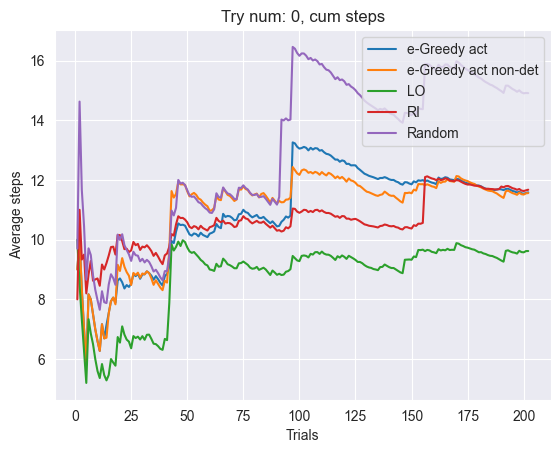

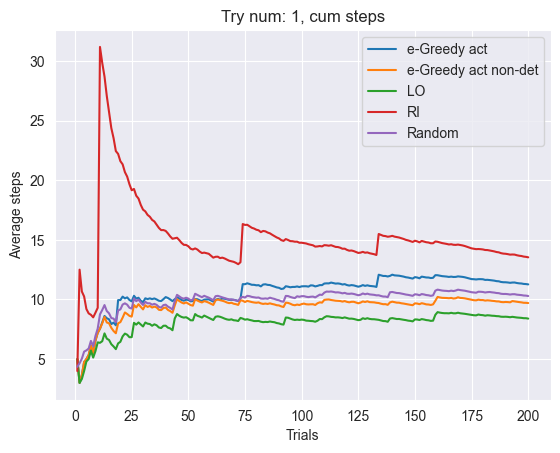

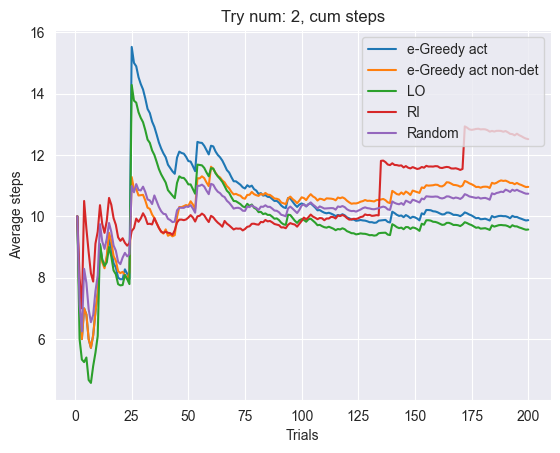

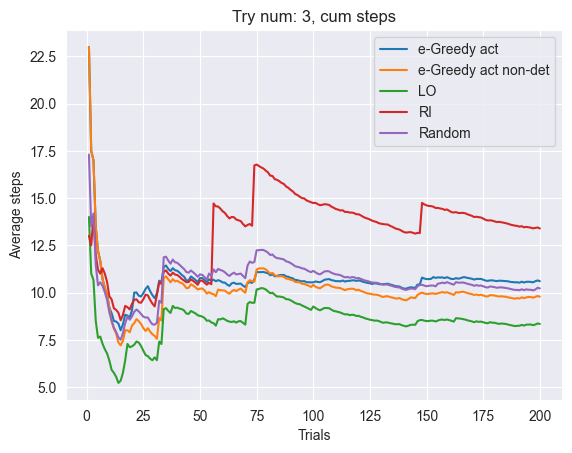

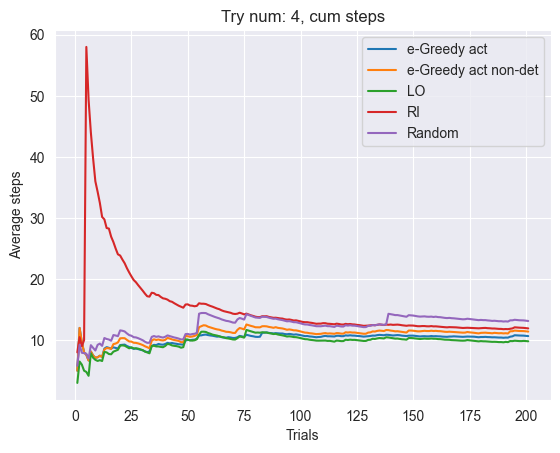

In [10]:
for i in range(COUNT_TESTS):
    comp_data = {
        "e-Greedy act": (steps_eg_all[i], "-"),
        "e-Greedy act non-det": (steps_eg_non_all[i], "-"),
        "LO": (stepsLO_all[i], "-"),
        "RI": ([steps if steps != np.inf else 250 for steps in stepsRI_all[i]], "-"),
        "Random": (
            [steps if steps != np.inf else 250 for steps in stepsRand_all[i]],
            "-",
        ),
    }

    draw_cumulative_avg_comparison(comp_data, title=f"Try num: {i}, cum steps")

### Without outliers

In [11]:
from scipy.stats import iqr


def get_outliers(x, axis=0, bar=1.5):
    d_iqr = iqr(x, axis=axis)
    d_q3 = np.percentile(x, 95, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)
    stat_shape[axis] = 1

    upper_range = d_q3 + iqr_distance
    upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)

    return [False if res else True for res in upper_outlier]


def clear_arr(arr):
    return np.array(arr)[get_outliers(np.array(arr))]

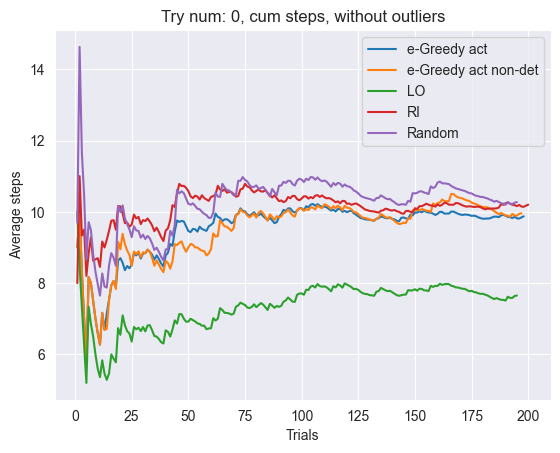

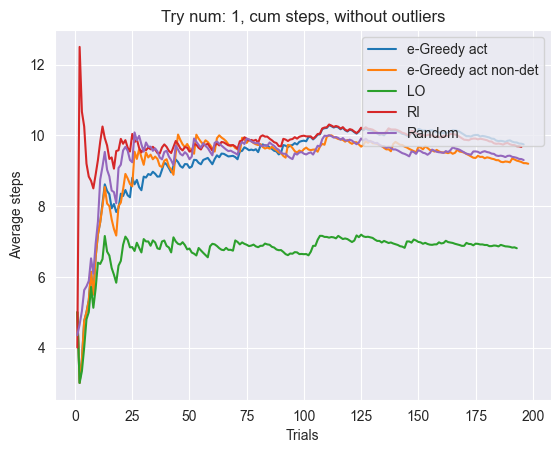

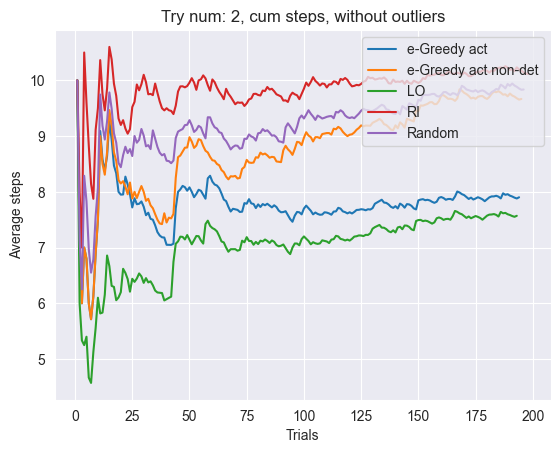

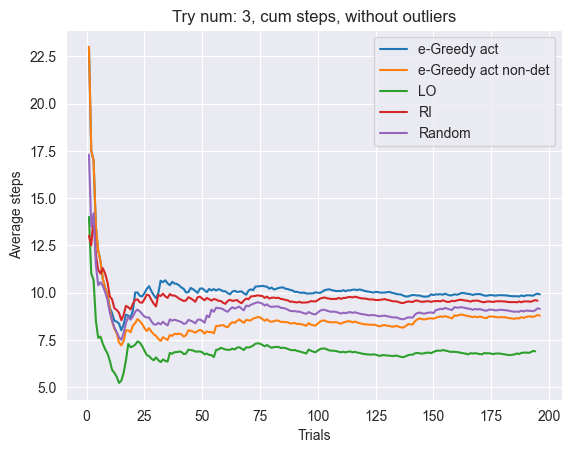

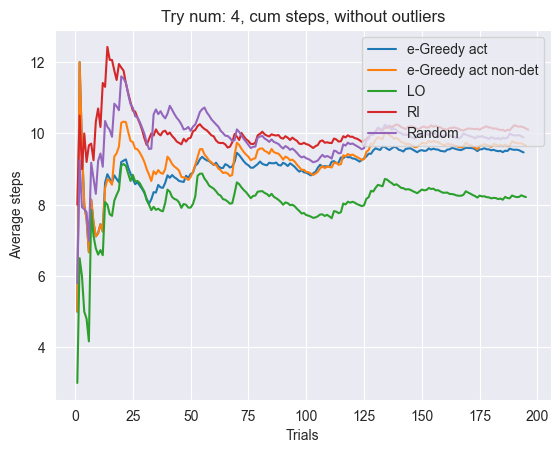

In [12]:
for i in range(COUNT_TESTS):
    comp_data = {
        "e-Greedy act": (clear_arr(steps_eg_all[i]), "-"),
        "e-Greedy act non-det": (clear_arr(steps_eg_non_all[i]), "-"),
        "LO": (clear_arr(stepsLO_all[i]), "-"),
        "RI": (clear_arr(stepsRI_all[i]), "-"),
        "Random": (clear_arr(stepsRand_all[i]), "-"),
    }

    draw_cumulative_avg_comparison(
        comp_data, title=f"Try num: {i}, cum steps, without outliers"
    )